In [1]:
import pandas as pd

# Задание 1-2

In [2]:
text_df = pd.read_csv('text.csv')
vocab_df = pd.read_csv('vocab.csv')

# Задание 3

In [3]:
merged_df = pd.merge(text_df, vocab_df, on='WORD', how='left')
merged_df

,WORDNO,WORD,POS
0,1,katekizmas,NaN
1,2,arba,KO
2,3,mokslas,NaN
3,4,kiekvienam,PI
4,5,krikščioniui,NaN
...,...,...,...
19417,16576,amžių,NaN
19418,16577,amžinų,ADJ
19419,16578,",",-
19420,16579,amen,PTK


# Задание 4

In [4]:
two_eq_pos_inarow = merged_df[merged_df['POS']==merged_df.shift(-1)['POS']]
two_eq_pos_inarow

,WORDNO,WORD,POS
9,10,Jokūbą,NT
12,13,societatis,-
13,14,Jesu,-
23,24,Mikalojų,NT
34,35,-,-
...,...,...,...
19259,16439,susimilęs,V
19277,16455,laimiai,ADV
19301,16476,tarnauti,V
19323,16492,ir,KO


# Задание 5

In [5]:
groups = merged_df.groupby('POS')

# Задание 6

In [6]:
temp = []
rolling_word_lengths = []
for group in groups:
    temp.append(len(group[1]))
    # Вычисляем длины слов
    group[1]['WORD_LENGTH'] = group[1]['WORD'].apply(lambda x: len(x))
    # Устанавливаем размеры окна для скользящего среднего и размер выборки. 
    # Последнее необходимо для упрощения отрисовки картинки, иначе слишком долго. 
    # Такой объем выборки только в 8 раз меньше объема самой большой группы.
    rolling_window = 5 if len(group[1]) >= 5 else len(group[1])
    sample_volume = 500 if len(group[1]) >= 500 else len(group[1])
    rolling_word_length = group[1]['WORD_LENGTH'].rolling(rolling_window).mean()
    rolling_word_length = rolling_word_length.sample(sample_volume)
    rolling_word_lengths.append(rolling_word_length.values.tolist())

In [7]:
print(sorted(temp))

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 12, 13, 19, 22, 24, 27, 29, 37, 54, 88, 96, 98, 152, 226, 310, 392, 407, 542, 804, 813, 1116, 1206, 1552, 2007, 2440, 3982]


In [8]:
roll_df = pd.DataFrame(rolling_word_lengths, index = [group[0] for group in groups])

# Задание 7

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

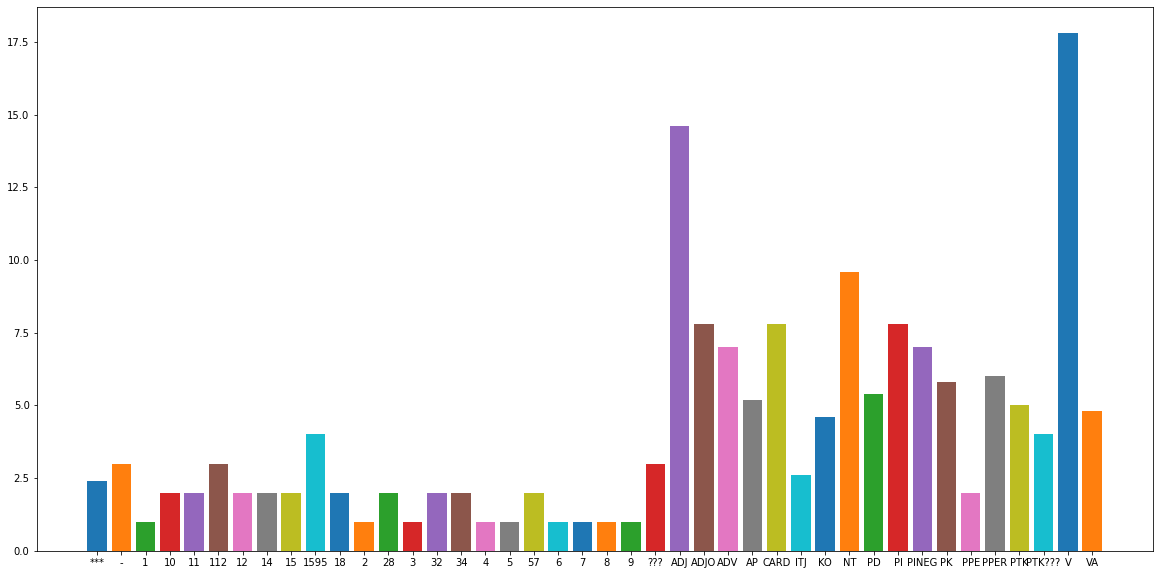

In [10]:
figure(figsize=(20, 10))

for i in roll_df.T:
    plt.bar(i, roll_df.loc[i])

plt.savefig('rolling_word_length.jpg')

plt.show()

# Задание 8

In [11]:
roll_df.to_html('rolling_word_lengths_grouped_by_pos.html')